In [53]:
import pandas as pd
import numpy as np
from datetime import datetime
import collections

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import sent_tokenize

from wordcloud import WordCloud, STOPWORDS

from helper import no_tokenize

In [54]:
true = pd.read_csv('data/True.csv')

In [55]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [56]:
true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [57]:
fake = pd.read_csv('data/fake.csv')

In [58]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [59]:
fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [60]:
fake[fake.subject == 'News']

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
9045,Judge Serves A Crushing Blow To The Florida G...,A Leon Circuit Judge in Florida has adopted a ...,News,"January 1, 2016"
9046,Bill Cosby Thanks ‘Friends And Fans’ In New Y...,Bill Cosby was America s favorite dad for a lo...,News,"January 1, 2016"
9047,Obama Announces ‘Unfinished Business’ For 201...,President Obama began the new year of 2016 wit...,News,"January 1, 2016"
9048,Damning New Evidence Shows How Israel Bribed ...,You probably can recall the huge diplomatic me...,News,"January 1, 2016"


In [61]:
true.shape, fake.shape

((21417, 4), (23481, 4))

In [62]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [63]:
fake['target']=1
true['target']=0

In [64]:
df = pd.concat([fake,true])

In [65]:
df.shape

(44898, 5)

# EDA List 
- word cloud (frequently used words), 

- word trend over time

- N grams

- topics 

- number of sentences 

- sentiment analysis 


In [66]:
# date column: switch string to datetime format.
lst = []
for date in df.date:
    try:
        d = datetime.strptime(date, '%B %d, %Y')
        lst.append(d.strftime('%m-%d-%y'))
    except ValueError:
        lst.append(date)
df.date = lst

lst = []
for date in df.date:
    try:
        d = datetime.strptime(date, '%b %d, %Y')
        lst.append(d.strftime('%m-%d-%y'))
    except ValueError:
        lst.append(date)
df.date = lst

lst = []
for date in df.date:
    try:
        d = datetime.strptime(date, '%B %d, %Y ')
        lst.append(d.strftime('%m-%d-%y'))
    except ValueError:
        lst.append(date)
df.date = lst

lst = []
for date in df.date:
    try:
        d = datetime.strptime(date, '%d-%b-%y')
        lst.append(d.strftime('%m-%d-%y'))
    except ValueError:
        lst.append(date)
df.date = lst

# filling https address to NaN value 
df.date = df.date.apply(lambda x: np.nan if 'https' in x else x)

# removing random string .... 
df.date = df.date.apply(lambda x: np.nan if 'MSNBC' in str(x) else x)

# change data type to datetime
df.date = pd.to_datetime(df.date)

# drop the index column
df = df.reset_index(drop= True)

# change data type of target to integer

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     44888 non-null  datetime64[ns]
 4   target   44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [68]:
lst = []
for sentence in df.text:
    lst.append(len(sent_tokenize(sentence)))
df['sentence_count'] = lst

In [69]:
df

,title,text,subject,date,target,sentence_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,28
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,11
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,25
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,15
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,19
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,0,15
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,0,6
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,0,16
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,0,8


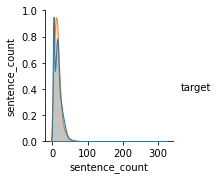

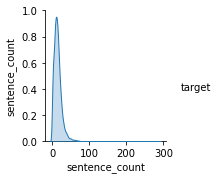

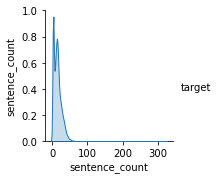

In [70]:
# number of sentence distribution 
sns.pairplot(df, hue="target")
sns.pairplot(df[df.target ==1], hue="target") # Fake news
sns.pairplot(df[df.target ==0], hue="target") # Real news

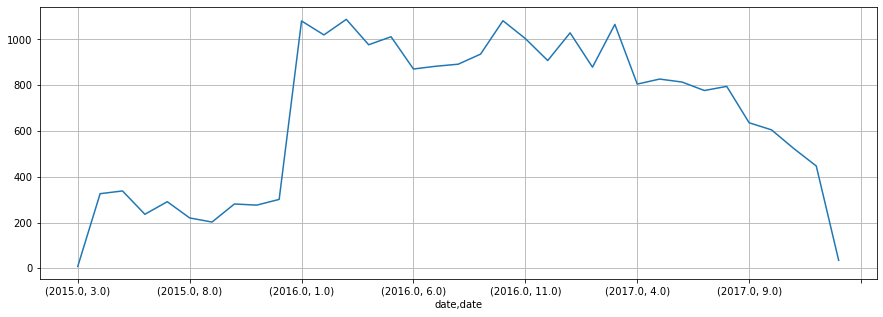

In [71]:
# plotting number of fake news over time 
plt.rcParams["figure.figsize"] = [15, 5]

df[df.target==1].groupby([df.date.dt.year, df.date.dt.month]).count().text.plot(kind='line')
plt.grid()

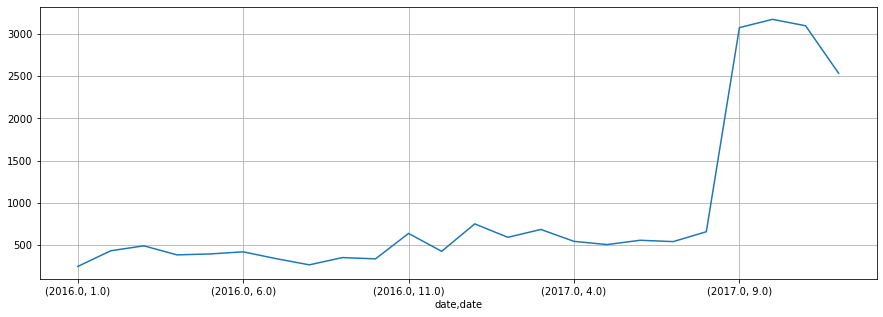

In [72]:
# plotting number of true news over time 
df[df.target==0].groupby([df.date.dt.year, df.date.dt.month]).count().text.plot(kind='line')
plt.grid()

In [91]:
# text preprocessing

df.text = df.text.apply(lambda x: no_tokenize(x))    

In [92]:
# title preprocessing

df.title = df.title.apply(lambda x: no_tokenize(x))    

In [117]:
df.sentence_count.min(), df.sentence_count.max()

(0, 321)

In [113]:
np.percentile(df.sentence_count,50)

13.0

In [114]:
df.sentence_count.mean()

14.865940576417659

In [115]:
np.percentile(df.sentence_count,25)

7.0

In [116]:
np.percentile(df.sentence_count,75)

19.0

In [94]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        #mask = np.array(Image.open("customer.png"))
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    #plt.savefig('img/wordcloud_' + str(title) )
    plt.imshow(wordcloud)
    plt.show()


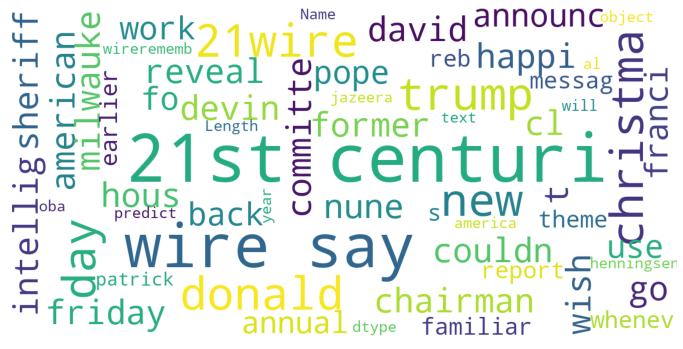

In [95]:
# word cloud for fake news
show_wordcloud(df[df.target==1].text)

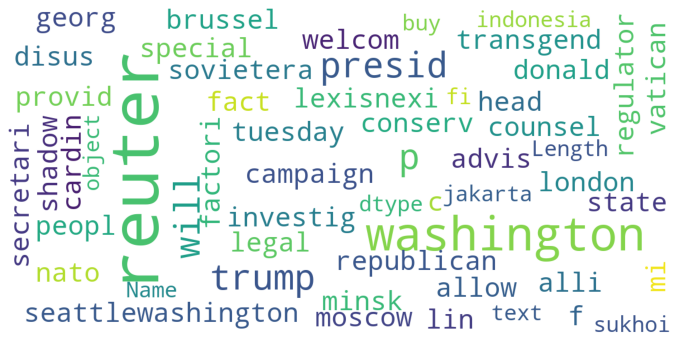

In [96]:
# word cloud for factual news
show_wordcloud(df[df.target==0].text)

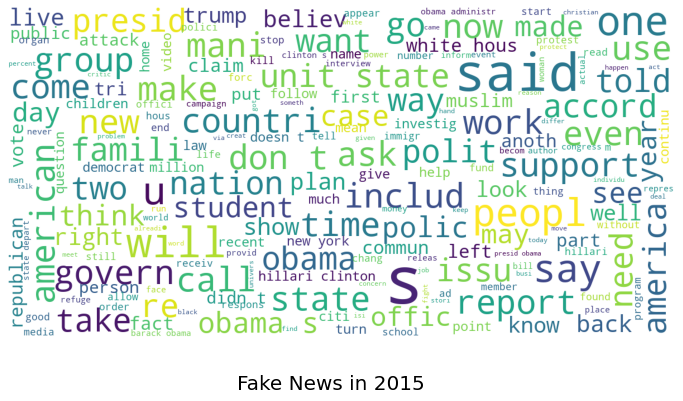

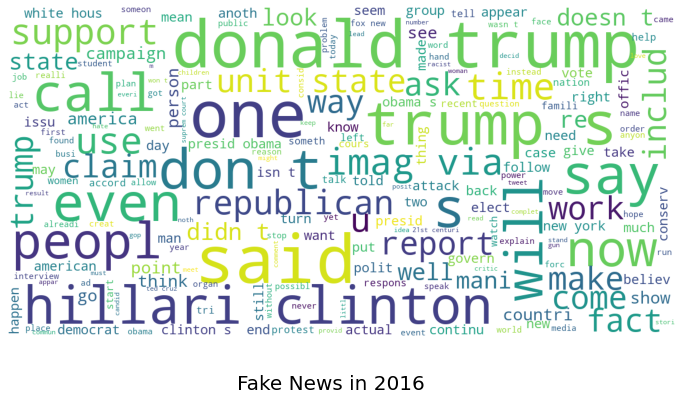

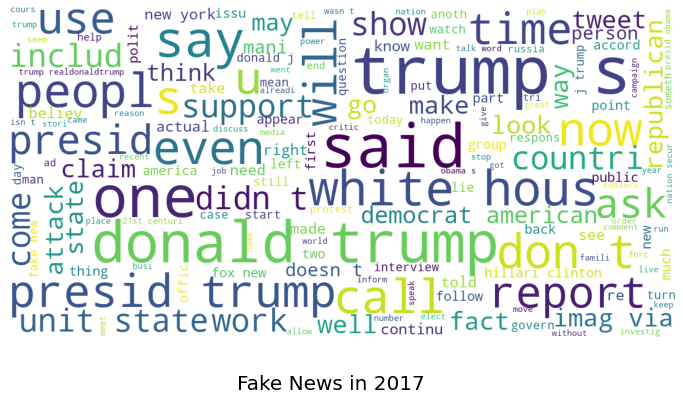

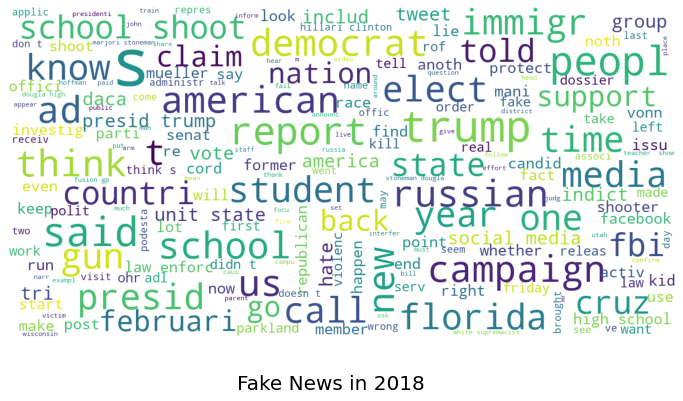

""


In [97]:
# fake news word cloud over years

df[df.target==1].groupby(df.date.dt.year).apply(
    lambda x: show_wordcloud(x['text'].tolist(), title=f"Fake News in {x.name}"[:-2])
)

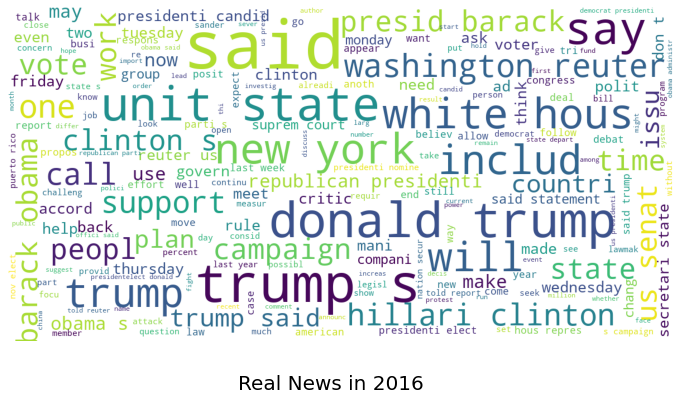

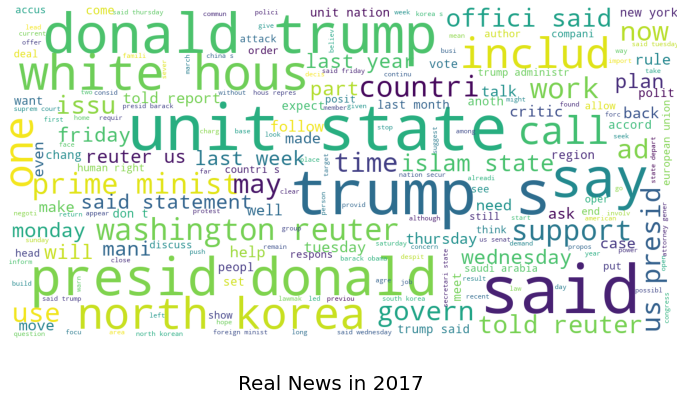

""


In [98]:
# fake news word cloud over years

df[df.target==0].groupby(df.date.dt.year).apply(
    lambda x: show_wordcloud(x['text'].tolist(), title=f"Real News in {x.name}"[:-2])
)

In [99]:
fake_lst = ' '.join(df[df.target==1].text)

In [100]:
real_lst = ' '.join(df[df.target==0].text)

In [105]:
stopwords = stopwords.union(set(['s','t','will', '’ ', '“ ', '” ']))

In [106]:
wordcount = {}


How many most common words to print:  20



OK. The 20 most common words are as follows

said :  260106
trump :  256274
’ :  141536
us :  126312
state :  120618
presid :  112480
“ :  108280
” :  107722
peopl :  82710
republican :  76236
one :  73474
say :  72932
year :  67014
new :  61850
govern :  59322
hous :  58006
reuter :  57542
clinton :  56234
report :  56206
democrat :  55816


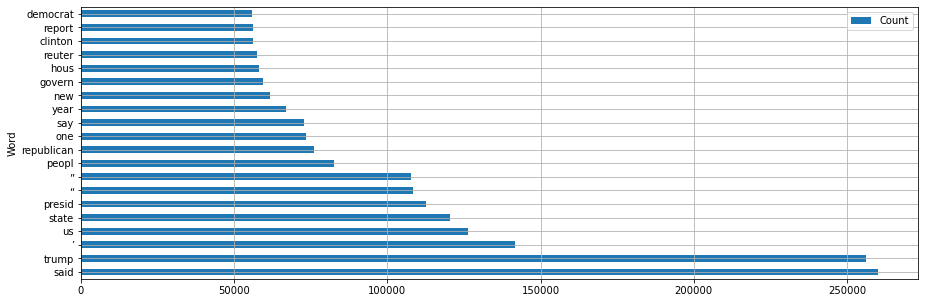

In [110]:
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in fake_lst.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

    # Create a data frame of the most common words  Draw a bar chart
lst = word_counter.most_common(n_print)
d = pd.DataFrame(lst, columns = ['Word', 'Count'])
d.plot.barh(x='Word',y='Count')
plt.grid()
plt.show()

How many most common words to print:  20



OK. The 20 most common words are as follows

said :  359148
trump :  310645
’ :  212304
us :  167463
“ :  162420
” :  161583
state :  157254
presid :  140866
republican :  98350
peopl :  98033
say :  88880
one :  86529
reuter :  85946
year :  85783
govern :  79542
new :  78637
hous :  75534
democrat :  72038
report :  69831
elect :  69668


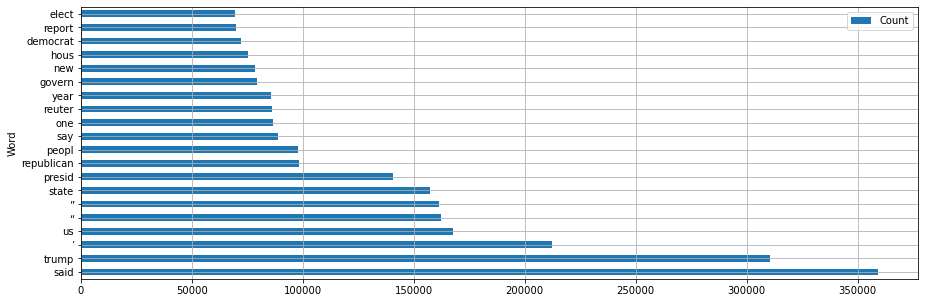

In [111]:
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in real_lst.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    word = word.replace("’ ","")
    word = word.replace("” ","")
    word = word.replace("“ ","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

    # Create a data frame of the most common words  Draw a bar chart
lst = word_counter.most_common(n_print)
d = pd.DataFrame(lst, columns = ['Word', 'Count'])
d.plot.barh(x='Word',y='Count')
plt.grid()
plt.show()